In [1]:

from bs4 import BeautifulSoup

html_file = r'C:\Users\dev\Downloads\twoormore.html'
with open(html_file, 'rb') as myfile:
    html_str = myfile.read()
w2om_dom = BeautifulSoup(html_str, 'lxml')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dev\\Downloads\\twoormore.html'

In [2]:

a_tags = w2om_dom.find_all('a')
youtube_set = set()
for a_tag in a_tags:
    if 'href' in a_tag.attrs.keys():
        a_href = a_tag['href']
        if '/watch?' in a_href:
            youtube_set.add(a_href)

NameError: name 'w2om_dom' is not defined

In [3]:

html_file = r'C:\Users\dev\Downloads\thepeople.html'
with open(html_file, 'rb') as myfile:
    html_str = myfile.read()
who_dom = BeautifulSoup(html_str, 'lxml')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dev\\Downloads\\thepeople.html'

In [4]:

import re

space_regex = re.compile('\s+')
idw_name_set = set()
idw_word_set = set()
h2_tags = who_dom.find_all('h2')
for h2_tag in h2_tags:
    a_tags = h2_tag.find_all('a')
    for a_tag in a_tags:
        idw_name = space_regex.sub(' ', a_tag.text.split('|')[0].strip())
        idw_name_set.add(idw_name)
        for idw_word in idw_name.split(' '):
            idw_word_set.add(idw_word)

NameError: name 'who_dom' is not defined

In [5]:

idw_word_set = set(['Claire', 'Carlin', 'Eric', 'Shepherd', 'Hicks', 'Ben', 'Sam', 'Dreger', 'Shapiro', 'Rogan', 'Dan',
                    'Saad', 'Hoff', 'Owen', 'Nicholas', 'Stephen', 'Bret', 'Ayaan', 'Hirsi', 'Haidt', 'Ferriss',
                    'Benjamin', 'the', 'Pool', 'Lindsay', 'Akira', 'Rebel', 'Maajid', 'Wisdom', 'Jonathan', 'Harris',
                    'James', 'Peterson', 'Ali', 'Heather', 'Weinstein', 'Christiansen', 'Jordan', 'Camille', 'Tim',
                    'Christina', 'Gad', 'Sommers', 'Douglas', 'Quillette', 'Heying', 'Lehmann', 'Christakis', 'Pinker',
                    'Dave', 'Shermer', 'Damore', 'Matt', 'Joe', 'Paglia', 'Michael', 'Carl', 'Murray', 'Nawaz',
                    'Alice', 'Steven', 'Crowder', 'Don', 'Rubin'])

In [6]:
'Rubin' in idw_word_set

True

In [7]:
'Dave Rubin' in idw_name_set

False

In [8]:

for content_tag in sitePageSoup.find_all(True, {'class': ['style-scope', 'ytd-expander']}):
    print(content_tag.text)
    print()
    for description_tag in content_tag.find_all(id='description'):
        print(description_tag)

NameError: name 'sitePageSoup' is not defined

In [9]:

r'\b(' + '|'.join(idw_word_set) + r')\b'

'\\b(Christakis|Shermer|Quillette|Hicks|Joe|Claire|Carlin|Dan|Rogan|Sam|Rubin|Pool|Ali|Dreger|Wisdom|Jonathan|Sommers|Heying|Ben|Harris|Peterson|Haidt|Douglas|Lehmann|Heather|the|Eric|Ferriss|Lindsay|Steven|James|Stephen|Murray|Saad|Tim|Don|Bret|Ayaan|Nawaz|Alice|Shapiro|Hirsi|Owen|Hoff|Maajid|Camille|Rebel|Carl|Akira|Gad|Pinker|Weinstein|Christina|Dave|Damore|Nicholas|Christiansen|Matt|Paglia|Benjamin|Michael|Crowder|Jordan|Shepherd)\\b'

In [10]:

for content_tag in sitePageSoup.find_all('title'):
    print(content_tag.text)

NameError: name 'sitePageSoup' is not defined

In [11]:

def cleanup_text(html_text):
    html_text = re.sub(r'\s+', ' ', html_text)
    html_text = re.sub(' [A-Z]\.? ', ' ', html_text)
    html_text = re.sub('Sargon of Akkad', 'Carl Benjamin', html_text)
    
    return html_text

In [12]:

def get_edge_tuple(channel_div, node_list):
    edge_tuple = set()
    edge_found = False
    for link in channel_div.find('a'):
        if link == 'The Rubin Report':
            edge_tuple = ('Dave Rubin', node_list[0])
            edge_found = True
            break
        elif link == 'StevenCrowder':
            edge_tuple = ('Steven Crowder', node_list[0])
            edge_found = True
            break
        elif link == 'PowerfulJRE':
            edge_tuple = ('Joe Rogan', node_list[0])
            edge_found = True
            break
        elif link == 'Jordan B Peterson':
            edge_tuple = ('Jordan Peterson', node_list[0])
            edge_found = True
            break
        elif link == 'Gad Saad':
            edge_tuple = ('Gad Saad', node_list[0])
            edge_found = True
            break
        elif link == 'Owen Benjamin':
            edge_tuple = ('Owen Benjamin', node_list[0])
            edge_found = True
            break
        elif link == 'The Thinkery':
            edge_tuple = ('Carl Benjamin', node_list[0])
            edge_found = True
            break
        elif link == 'Matt Christiansen':
            edge_tuple = ('Matt Christiansen', node_list[0])
            edge_found = True
            break
        elif link == 'The Daily Wire':
            edge_tuple = ('Ben Shapiro', node_list[0])
            edge_found = True
            break
        elif link == 'Sargon of Akkad':
            edge_tuple = ('Carl Benjamin', node_list[0])
            edge_found = True
            break
        elif link == 'Sargon of Akkad Livestreams':
            edge_tuple = ('Carl Benjamin', node_list[0])
            edge_found = True
            break
                
    return edge_tuple, edge_found, link

In [183]:

for site_url in list(youtube_set):
    sitePage = requests.get(url=site_url)
    sitePageSoup = BeautifulSoup(sitePage.content, 'lxml')
    node_list = []
    youtube_title = cleanup_text(sitePageSoup.title.text)
    for match_obj in idw_name_regex.finditer(youtube_title):
        node_list.append(str(match_obj.group()))
    youtube_url_set_dict = nx.get_edge_attributes(idw_graph, 'youtube_url_set')
    
    # <div class="yt-user-info">
    channel_div = sitePageSoup.find('div', class_='yt-user-info')
    
    if len(node_list) < 2:
        description_text = cleanup_text(sitePageSoup.find('p', id='eow-description').text)
        for match_obj in idw_name_regex.finditer(description_text):
            node_list.append(str(match_obj.group()))
    if len(node_list) > 1:
        edge_tuple = (node_list[0], node_list[1])
    elif len(node_list) < 1:
        for link in channel_div.find('a'):
            print('\n{} does not contain any IDW members. Channel is "{}". URL is "{}".'.format(youtube_title, link, site_url))
            break
    else:
        edge_tuple, edge_found, link = get_edge_tuple(channel_div, node_list)
        if not edge_found:
            print('\n{} does not contain two IDW members. Channel is "{}". URL is "{}".'.format(youtube_title, link, site_url))
    
    if edge_tuple != set():
        youtube_url_set = youtube_url_set_dict.get(edge_tuple, set())
        youtube_url_set.add(site_url)
        idw_graph.add_edge(edge_tuple[0], edge_tuple[1], youtube_url_set=youtube_url_set)


The Thinkery Podcast #18 - Yaron Brook - YouTube does not contain any IDW members. Channel is "The Thinkery". URL is "https://www.youtube.com/watch?v=oH-SUMCz-L0".

Channel 4 Jordan Peterson Interview, my thoughts - YouTube does not contain two IDW members. Channel is "karen straughan". URL is "https://www.youtube.com/watch?v=_UwK-my_Kmw".

The Master and His Emissary: Conversation with Dr. Iain McGilchrist - YouTube does not contain any IDW members. Channel is "Jordan B Peterson". URL is "https://www.youtube.com/watch?v=xtf4FDlpPZ8".

Why Do We Disagree Politically? - YouTube does not contain two IDW members. Channel is "The Agenda with Steve Paikin". URL is "https://www.youtube.com/watch?v=rdiTwxUiIVY".

Objectivist Ethics with Yaron Brook - YouTube does not contain any IDW members. Channel is "Sargon of Akkad Livestreams". URL is "https://www.youtube.com/watch?v=6eIQjGF9jrQ".


In [13]:

import networkx as nx
import matplotlib.pyplot as plt
import collections
%matplotlib inline

# Create graph
idw_graph = nx.Graph()
idw_name_set = set(['Tim Ferriss', 'Ben Shapiro', 'Lindsay Shepherd', 'Michael Shermer', 'Steven Pinker',
                    'Dan Carlin', 'Dave Rubin', 'Akira the Don', 'James Damore', 'Nicholas Christakis',
                    'Eric Weinstein', 'Owen Benjamin', 'Steven Crowder', 'Matt Christiansen', 'Carl Benjamin',
                    'Heather Heying', 'Rebel Wisdom', 'Bret Weinstein', 'Jordan Peterson', 'Tim Pool',
                    'Douglas Murray', 'Gad Saad', 'Joe Rogan', 'Camille Paglia', 'Quillette', 'Claire Lehmann',
                    'Sam Harris', 'Alice Dreger', 'Stephen Hicks', 'Christina Hoff Sommers', 'Ayaan Hirsi Ali',
                    'Maajid Nawaz', 'Jonathan Haidt'])
idw_graph.add_nodes_from(idw_name_set)

# Join the who together in a regex
idw_name_regex = re.compile('(' + '|'.join(idw_name_set) + ')')

In [20]:

idw_edge_list = [('Tim Ferriss', 'Dave Rubin', {'youtube_url_set': {'https://www.youtube.com/watch?v=QP2-8Zox4W8'}}),
                 ('Tim Ferriss', 'Eric Weinstein', {'youtube_url_set': {'https://www.youtube.com/watch?v=8LPwyy4scAc'}}),
                 ('Tim Ferriss', 'Dan Carlin', {'youtube_url_set': {'https://www.youtube.com/watch?v=gWVH8xkdhaY'}}),
                 ('Tim Ferriss', 'Joe Rogan', {'youtube_url_set': {'https://www.youtube.com/watch?v=IRyO_nd4aFY'}}),
                 ('Tim Ferriss', 'Sam Harris', {'youtube_url_set': {'https://www.youtube.com/watch?v=W7LvxGfP7II'}}),
                 ('Ben Shapiro', 'Eric Weinstein', {'youtube_url_set': {'https://www.youtube.com/watch?v=HOxmIjiRqTw'}}),
                 ('Ben Shapiro', 'James Damore', {'youtube_url_set': {'https://www.youtube.com/watch?v=RPGXkPVw93A'}}),
                 ('Ben Shapiro', 'Dave Rubin', {'youtube_url_set': {'https://www.youtube.com/watch?v=FmH7JUeVQb8'}}),
                 ('Ben Shapiro', 'Jordan Peterson', {'youtube_url_set': {'https://www.youtube.com/watch?v=iRPDGEgaATU'}}),
                 ('Ben Shapiro', 'Joe Rogan', {'youtube_url_set': {'https://www.youtube.com/watch?v=JDh3CxtZveY'}}),
                 ('Lindsay Shepherd', 'Dave Rubin', {'youtube_url_set': {'https://www.youtube.com/watch?v=vpFUvfAvKs4'}}),
                 ('Lindsay Shepherd', 'Jordan Peterson', {'youtube_url_set': {'https://www.youtube.com/watch?v=Ob3rvRO5CCs'}}),
                 ('Lindsay Shepherd', 'Gad Saad', {'youtube_url_set': {'https://www.youtube.com/watch?v=ZwUMk8DtuQ0'}}),
                 ('Michael Shermer', 'Joe Rogan', {'youtube_url_set': {'https://www.youtube.com/watch?v=x2qwRJT4WGY'}}),
                 ('Michael Shermer', 'Dave Rubin', {'youtube_url_set': {'https://www.youtube.com/watch?v=w9nsIkGntVA'}}),
                 ('Michael Shermer', 'Jordan Peterson', {'youtube_url_set': {'https://www.youtube.com/watch?v=Mff2I8Jzjl0'}}),
                 ('Steven Pinker', 'Dave Rubin', {'youtube_url_set': {'https://www.youtube.com/watch?v=oQdWszO9ps0'}}),
                 ('Steven Pinker', 'Jordan Peterson', {'youtube_url_set': {'https://www.youtube.com/watch?v=7kUuURByaXc'}}),
                 ('Steven Pinker', 'Sam Harris', {'youtube_url_set': {'https://www.youtube.com/watch?v=8-Jbiuu_t_0'}}),
                 ('Steven Pinker', 'Joe Rogan', {'youtube_url_set': {'https://www.youtube.com/watch?v=VUDAdOdF6Zg'}}),
                 ('Dan Carlin', 'Joe Rogan', {'youtube_url_set': {'https://www.youtube.com/watch?v=np9yc7hp0vc'}}),
                 ('Dan Carlin', 'Dave Rubin', {'youtube_url_set': {'https://www.youtube.com/watch?v=3lQNBpFQ3N0',
                                                                   'https://www.youtube.com/watch?v=wHa-RajyzIY'}}),
                 ('Dave Rubin', 'Steven Crowder', {'youtube_url_set': {'https://www.youtube.com/watch?v=7FfdhzYJPJA'}}),
                 ('Dave Rubin', 'Jordan Peterson', {'youtube_url_set': {'https://www.youtube.com/watch?v=iP2WlfTiohw'}}),
                 ('Dave Rubin', 'Douglas Murray', {'youtube_url_set': {'https://www.youtube.com/watch?v=soyuC-RfjME'}}),
                 ('Dave Rubin', 'Owen Benjamin', {'youtube_url_set': {'https://www.youtube.com/watch?v=8vrRY6JXKGw'}}),
                 ('Dave Rubin', 'Carl Benjamin', {'youtube_url_set': {'https://www.youtube.com/watch?v=A_oavkedzb4'}}),
                 ('Dave Rubin', 'Gad Saad', {'youtube_url_set': {'https://www.youtube.com/watch?v=Jq1utGg0PUY'}}),
                 ('Dave Rubin', 'Ayaan Hirsi Ali', {'youtube_url_set': {'https://www.youtube.com/watch?v=CrJuHWTZqRg'}}),
                 ('Dave Rubin', 'Joe Rogan', {'youtube_url_set': {'https://www.youtube.com/watch?v=EIFZV89Zhp8'}}),
                 ('Dave Rubin', 'Eric Weinstein', {'youtube_url_set': {'https://www.youtube.com/watch?v=eloBdLBulj0',
                                                                       'https://www.youtube.com/watch?v=oH-SUMCz-L0',
                                                                       'https://www.youtube.com/watch?v=MmXq97do-tQ',
                                                                       'https://www.youtube.com/watch?v=gKyBiOKYo3U'}}),
                 ('Dave Rubin', 'Tim Pool', {'youtube_url_set': {'https://www.youtube.com/watch?v=bAOmyWMxhbw',
                                                                 'https://www.youtube.com/watch?v=ST6kj9OEYf0'}}),
                 ('Dave Rubin', 'Jonathan Haidt', {'youtube_url_set': {'https://www.youtube.com/watch?v=rKfwde2cOEk',
                                                                       'https://www.youtube.com/watch?v=bNI0_oW-TcE'}}),
                 ('Dave Rubin', 'James Damore', {'youtube_url_set': {'https://www.youtube.com/watch?v=6NOSD0XK0r8',
                                                                     'https://www.youtube.com/watch?v=iGJx4qyc7mM'}}),
                 ('Dave Rubin', 'Dave Rubin', {'youtube_url_set': {'https://www.youtube.com/watch?v=RJU94mjrC8Q'}}),
                 ('Dave Rubin', 'Sam Harris', {'youtube_url_set': {'https://www.youtube.com/watch?v=zQqxlzHJrU0'}}),
                 ('Dave Rubin', 'Christina Hoff Sommers', {'youtube_url_set': {'https://www.youtube.com/watch?v=y0JlRX9hOGY',
                                                                               'https://www.youtube.com/watch?v=VJMCQ94t98k'}}),
                 ('Dave Rubin', 'Maajid Nawaz', {'youtube_url_set': {'https://www.youtube.com/watch?v=1CYuwBcPObQ'}}),
                 ('Dave Rubin', 'Bret Weinstein', {'youtube_url_set': {'https://www.youtube.com/watch?v=PIDJHbngfM8'}}),
                 ('Akira the Don', 'Jordan Peterson', {'youtube_url_set': {'https://www.youtube.com/watch?v=qZ1BpzfFDdc'}}),
                 ('James Damore', 'Gad Saad', {'youtube_url_set': {'https://www.youtube.com/watch?v=aTfk4DkijVs'}}),
                 ('James Damore', 'Jordan Peterson', {'youtube_url_set': {'https://www.youtube.com/watch?v=VCrQ3EU8_PM'}}),
                 ('James Damore', 'Joe Rogan', {'youtube_url_set': {'https://www.youtube.com/watch?v=uQ1JeII0eGo'}}),
                 ('Nicholas Christakis', 'Sam Harris', {'youtube_url_set': {'https://www.youtube.com/watch?v=S544c_JRhQk'}}),
                 ('Eric Weinstein', 'Sam Harris', {'youtube_url_set': {'https://www.youtube.com/watch?v=yTWCl32j8jM'}}),
                 ('Eric Weinstein', 'Joe Rogan', {'youtube_url_set': {'https://www.youtube.com/watch?v=5Ivf9jrXGAY'}}),
                 ('Owen Benjamin', 'Joe Rogan', {'youtube_url_set': {'https://www.youtube.com/watch?v=FGEwZVplBt8'}}),
                 ('Owen Benjamin', 'Jordan Peterson', {'youtube_url_set': {'https://www.youtube.com/watch?v=i_f2mu7Q_Mc'}}),
                 ('Owen Benjamin', 'Steven Crowder', {'youtube_url_set': {'https://www.youtube.com/watch?v=d8nn-sLOu5Y'}}),
                 ('Steven Crowder', 'Jordan Peterson', {'youtube_url_set': {'https://www.youtube.com/watch?v=YttQnPy65d8',
                                                                            'https://www.youtube.com/watch?v=YS5aoIV55gw'}}),
                 ('Steven Crowder', 'Joe Rogan', {'youtube_url_set': {'https://www.youtube.com/watch?v=v4IyBf0iPsY'}}),
                 ('Steven Crowder', 'Christina Hoff Sommers',
                  {'youtube_url_set': {'https://www.youtube.com/watch?v=yCcp36n2cDg'}}),
                 ('Carl Benjamin', 'Tim Pool', {'youtube_url_set': {'https://www.youtube.com/watch?v=J2Rip3Pn_tA'}}),
                 ('Carl Benjamin', 'Jordan Peterson', {'youtube_url_set': {'https://www.youtube.com/watch?v=FnJ3A-IYP7c',
                                                                           'https://www.youtube.com/watch?v=4whIn1UloCo'}}),
                 ('Carl Benjamin', 'Joe Rogan', {'youtube_url_set': {'https://www.youtube.com/watch?v=xrBCsLsSD2E'}}),
                 ('Carl Benjamin', 'Gad Saad', {'youtube_url_set': {'https://www.youtube.com/watch?v=RMxpSLWXgvs'}}),
                 ('Bret Weinstein', 'Joe Rogan', {'youtube_url_set': {'https://www.youtube.com/watch?v=LzAgSp_O03I'}}),
                 ('Bret Weinstein', 'Jordan Peterson', {'youtube_url_set': {'https://www.youtube.com/watch?v=0cLLFSdKZLI'}}),
                 ('Bret Weinstein', 'Gad Saad', {'youtube_url_set': {'https://www.youtube.com/watch?v=JkO0nk8OKz4'}}),
                 ('Bret Weinstein', 'Sam Harris', {'youtube_url_set': {'https://www.youtube.com/watch?v=20ku1H4VzfQ'}}),
                 ('Jordan Peterson', 'Sam Harris', {'youtube_url_set': {'https://www.youtube.com/watch?v=trhTbEs2GGE'}}),
                 ('Jordan Peterson', 'Gad Saad', {'youtube_url_set': {'https://www.youtube.com/watch?v=tqYVMoYbQ7w'}}),
                 ('Jordan Peterson', 'Joe Rogan', {'youtube_url_set': {'https://www.youtube.com/watch?v=6T7pUEZfgdI'}}),
                 ('Jordan Peterson', 'Camille Paglia', {'youtube_url_set': {'https://www.youtube.com/watch?v=xtf4FDlpPZ8',
                                                                            'https://www.youtube.com/watch?v=jUnAF1InVR4',
                                                                            'https://www.youtube.com/watch?v=1gdpyzwOOYY',
                                                                            'https://www.youtube.com/watch?v=v-hIVnmUdXM'}}),
                 ('Jordan Peterson', 'Maajid Nawaz', {'youtube_url_set': {'https://www.youtube.com/watch?v=IMBfT38xbhU'}}),
                 ('Jordan Peterson', 'Jonathan Haidt', {'youtube_url_set': {'https://www.youtube.com/watch?v=4IBegL_V6AA'}}),
                 ('Jordan Peterson', 'Ayaan Hirsi Ali', {'youtube_url_set': {'https://www.youtube.com/watch?v=RBl5PfA5HfU'}}),
                 ('Douglas Murray', 'Joe Rogan', {'youtube_url_set': {'https://www.youtube.com/watch?v=rBp4afbDeLk'}}),
                 ('Douglas Murray', 'Gad Saad', {'youtube_url_set': {'https://www.youtube.com/watch?v=ajI5umH9LZo'}}),
                 ('Douglas Murray', 'Sam Harris', {'youtube_url_set': {'https://www.youtube.com/watch?v=HSWqwZXth0I'}}),
                 ('Gad Saad', 'Joe Rogan', {'youtube_url_set': {'https://www.youtube.com/watch?v=rks0RpzXhzI'}}),
                 ('Gad Saad', 'Sam Harris', {'youtube_url_set': {'https://www.youtube.com/watch?v=tlAGylsVTOM'}}),
                 ('Gad Saad', 'Christina Hoff Sommers', {'youtube_url_set': {'https://www.youtube.com/watch?v=wtlE32skcg4'}}),
                 ('Joe Rogan', 'Sam Harris', {'youtube_url_set': {'https://www.youtube.com/watch?v=WHBfB7usIcU',
                                                                  'https://www.youtube.com/watch?v=Ixc9i1G7eew',
                                                                  'https://www.youtube.com/watch?v=Gm8xFaM-raY',
                                                                  'https://www.youtube.com/watch?v=6eIQjGF9jrQ',
                                                                  'https://www.youtube.com/watch?v=lGdPcC0zBIQ',
                                                                  'https://www.youtube.com/watch?v=w8Q6CWv7IXo',
                                                                  'https://www.youtube.com/watch?v=FHhTWCknDLs',
                                                                  'https://www.youtube.com/watch?v=RJ5_hAEsLkU',
                                                                  'https://www.youtube.com/watch?v=S4utkb6vSyQ'}}),
                 ('Joe Rogan', 'Joe Rogan', {'youtube_url_set': {'https://www.youtube.com/watch?v=S_hS-JXoTMk'}}),
                 ('Camille Paglia', 'Christina Hoff Sommers',
                  {'youtube_url_set': {'https://www.youtube.com/watch?v=iv7LvRhvgNI'}}),
                 ('Quillette', 'Claire Lehmann', {'youtube_url_set': {'https://www.youtube.com/watch?v=OUs72-WqmwI'}}),
                 ('Sam Harris', 'Maajid Nawaz', {'youtube_url_set': {'https://www.youtube.com/watch?v=YTd4-WXw2SM'}}),
                 ('Sam Harris', 'Jonathan Haidt', {'youtube_url_set': {'https://www.youtube.com/watch?v=VshD1NcfUs4'}}),
                 ('Sam Harris', 'Ayaan Hirsi Ali', {'youtube_url_set': {'https://www.youtube.com/watch?v=gS_JODe6IWs',
                                                                        'https://www.youtube.com/watch?v=sOMjEJ3JO5Q'}})]
idw_graph.add_edges_from(idw_edge_list)

In [21]:

idw_graph.nodes(data=False)

NodeView(('Bret Weinstein', 'Quillette', 'Carl Benjamin', 'Claire Lehmann', 'Sam Harris', 'Camille Paglia', 'James Damore', 'Michael Shermer', 'Gad Saad', 'Alice Dreger', 'Ayaan Hirsi Ali', 'Heather Heying', 'Stephen Hicks', 'Nicholas Christakis', 'Jonathan Haidt', 'Douglas Murray', 'Tim Pool', 'Tim Ferriss', 'Ben Shapiro', 'Lindsay Shepherd', 'Eric Weinstein', 'Owen Benjamin', 'Akira the Don', 'Rebel Wisdom', 'Dan Carlin', 'Jordan Peterson', 'Christina Hoff Sommers', 'Maajid Nawaz', 'Matt Christiansen', 'Steven Crowder', 'Dave Rubin', 'Joe Rogan', 'Steven Pinker'))

In [15]:

# Draw the graph using various layouts
def get_layout_dict(G):
    layout_dict = {}
    for layout_type in [function for function in dir(nx) if '_layout' in function]:
        try:
            layout_dict[layout_type] = getattr(nx, layout_type)(G)
        except Exception as e:
            print(layout_type, e)
    
    return layout_dict

In [17]:

def draw_graph(G, pos_dict, degree_dict):
    plt.figure(figsize=(18, 8))
    label_dict = nx.draw_networkx_labels(G, pos=pos_dict, font_size=12)
    line_collection = nx.draw_networkx_edges(G, pos=pos_dict, width=2.5, alpha=0.25)
    
    # Color according to degree
    node_list = G.nodes()
    node_color_list = [degree_dict[node] for node in node_list]
    path_collection = nx.draw_networkx_nodes(G, pos=pos_dict, nodelist=node_list, alpha=0.45,
                                             node_size=2400, node_color=node_color_list, cmap='viridis_r')

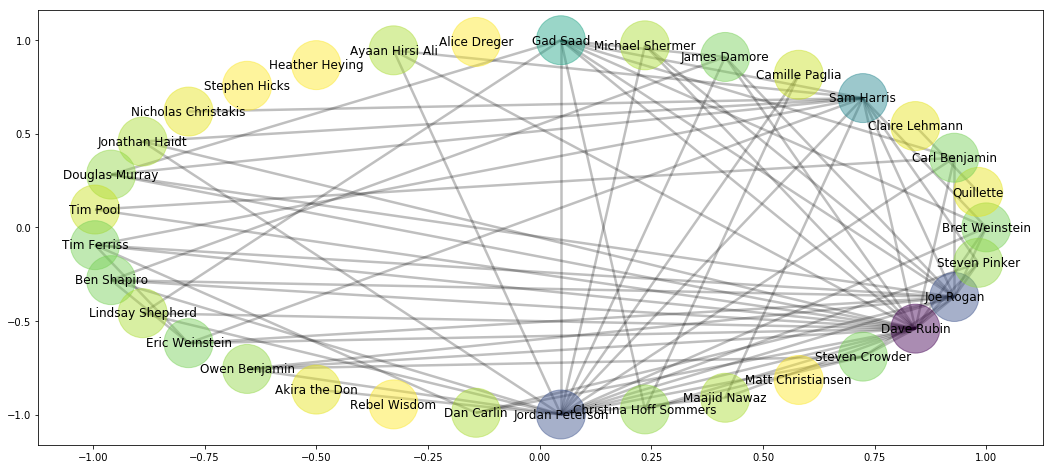

In [22]:

# Draw the graph using various layouts
pos_dict = LAYOUT_DICT['circular_layout']
degree_dict = idw_graph.degree()
draw_graph(idw_graph, pos_dict, degree_dict)

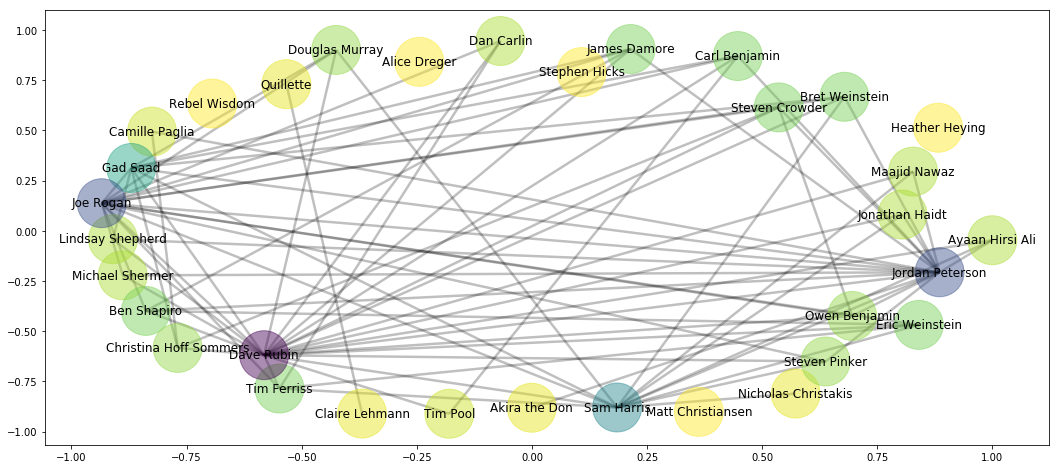

In [23]:

# Draw the graph using various layouts
pos_dict = LAYOUT_DICT['fruchterman_reingold_layout']
draw_graph(idw_graph, pos_dict, degree_dict)

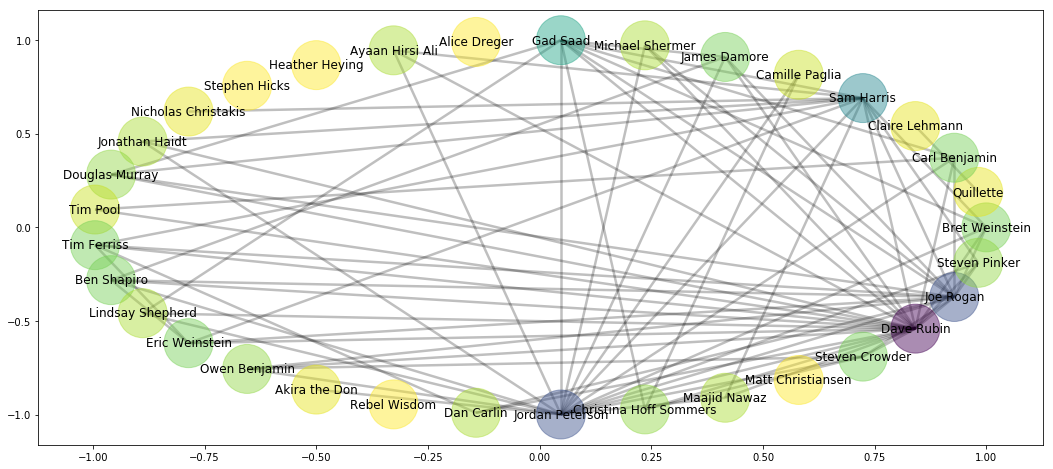

In [26]:

# Draw the graph using various layouts
pos_dict = LAYOUT_DICT['kamada_kawai_layout']
draw_graph(idw_graph, pos_dict, degree_dict)

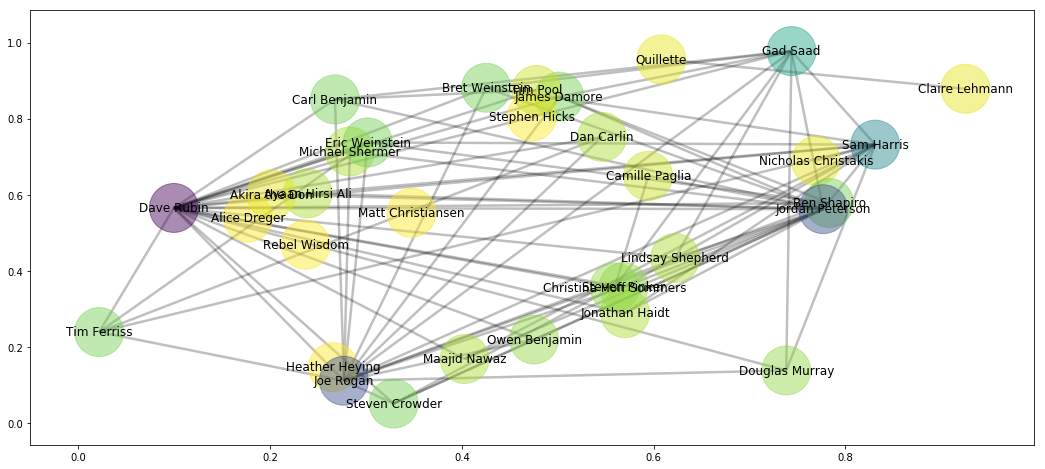

In [25]:

# Draw the graph using various layouts
pos_dict = LAYOUT_DICT['random_layout']
draw_graph(idw_graph, pos_dict, degree_dict)

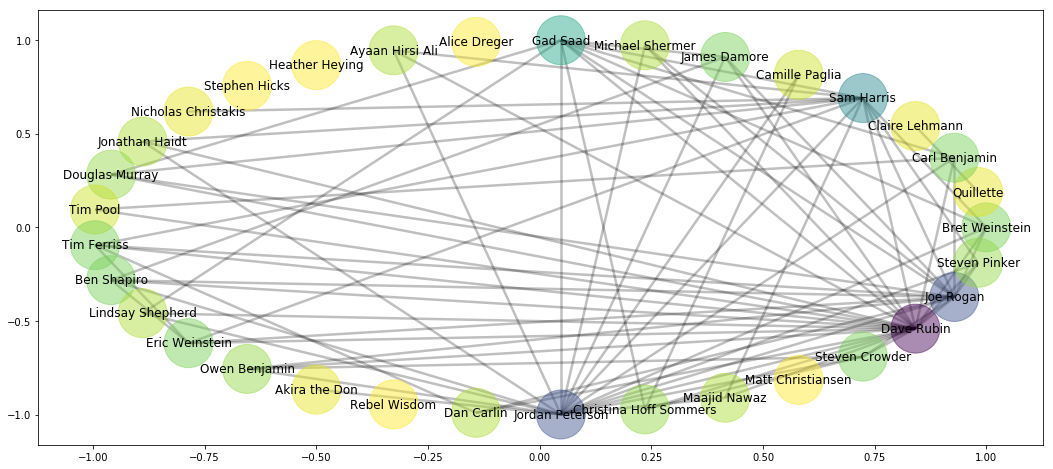

In [27]:

# Draw the graph using various layouts
pos_dict = LAYOUT_DICT['shell_layout']
draw_graph(idw_graph, pos_dict, degree_dict)

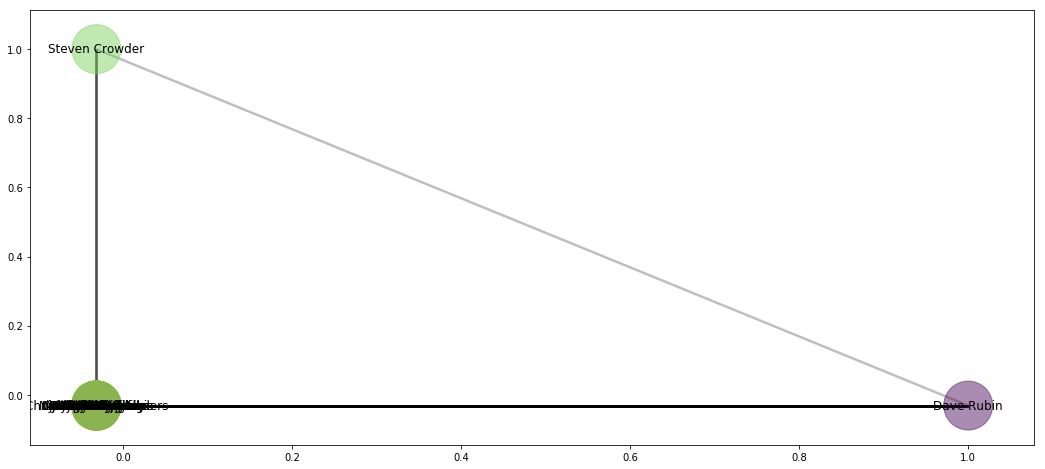

In [28]:

# Draw the graph using various layouts
pos_dict = LAYOUT_DICT['spectral_layout']
draw_graph(idw_graph, pos_dict, degree_dict)

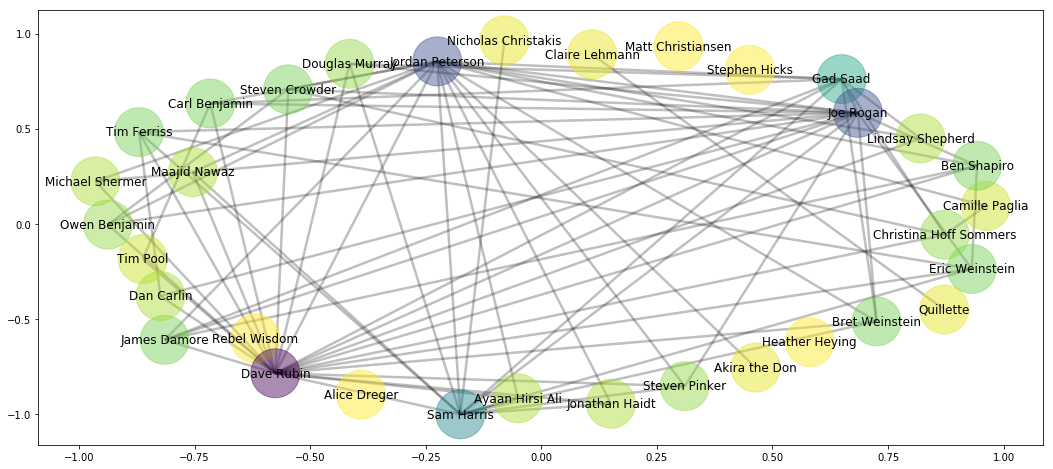

In [29]:

# Draw the graph using various layouts
pos_dict = LAYOUT_DICT['spring_layout']
draw_graph(idw_graph, pos_dict, degree_dict)

In [16]:

LAYOUT_DICT = get_layout_dict(idw_graph)
print(LAYOUT_DICT.keys())

rescale_layout 'Graph' object has no attribute 'shape'
dict_keys(['circular_layout', 'fruchterman_reingold_layout', 'kamada_kawai_layout', 'random_layout', 'shell_layout', 'spectral_layout', 'spring_layout'])


In [31]:

# Export the graph into Gephi
SAVES_FOLDER = '../saves/'
file_path = SAVES_FOLDER+'/gexf/idw_graph.gexf'
nx.write_gexf(idw_graph, file_path)

KeyError: <class 'set'>

In [162]:

import requests

# Retrieve the page with tag results and set it up to be scraped
site_url = 'https://www.youtube.com/watch?v=VCrQ3EU8_PM'
sitePage = requests.get(url=site_url)
problem_html = sitePage.content
sitePageSoup = BeautifulSoup(problem_html, 'lxml')
with open(r'C:\Users\dev\Downloads\problem.html', 'w') as text_file:
    print(problem_html, file=text_file)

In [163]:

# #eow-description
sitePageSoup.find('p', id='eow-description').text

'On February 17, 2018, James Damore spoke at Portland State on a panel titled, "We Need to Talk About Diversity." He was joined by former Evergreen State biologist Heather E. Heying, PSU philosophy professor Peter Boghossian, and writer Helen Pluckrose. Bret Weinstein also made a cameo appearance. The event was organized by the Freethinkers of PSU, a skeptic student group. Related video: Two days after this panel, some of the panelists spoke at another student event to discuss, "Is intersectionality a religion? Watch: https://www.youtube.com/watch?v=_Avyq...Related articles: https://www.wsj.com/articles/antifa-r...http://quillette.com/2018/02/25/damor...'

In [159]:

'|'.join(idw_name_set)

'Tim Ferriss|Ben Shapiro|Lindsay Shepherd|Michael Shermer|Steven Pinker|Dan Carlin|Dave Rubin|Akira the Don|James Damore|Nicholas Christakis|Eric Weinstein|Owen Benjamin|Steven Crowder|Matt Christiansen|Carl Benjamin|Heather Heying|Rebel Wisdom|Bret Weinstein|Jordan Peterson|Tim Pool|Douglas Murray|Gad Saad|Joe Rogan|Camille Paglia|Quillette|Claire Lehmann|Sam Harris|Alice Dreger|Stephen Hicks|Christina Hoff Sommers|Ayaan Hirsi Ali|Maajid Nawaz|Jonathan Haidt'

In [151]:

idw_graph.edges(data=True)

EdgeDataView([('Tim Ferriss', 'Dave Rubin', {'youtube_url_set': {'https://www.youtube.com/watch?v=QP2-8Zox4W8'}}), ('Tim Ferriss', 'Eric Weinstein', {'youtube_url_set': {'https://www.youtube.com/watch?v=8LPwyy4scAc'}}), ('Tim Ferriss', 'Dan Carlin', {'youtube_url_set': {'https://www.youtube.com/watch?v=gWVH8xkdhaY'}}), ('Tim Ferriss', 'Joe Rogan', {'youtube_url_set': {'https://www.youtube.com/watch?v=IRyO_nd4aFY'}}), ('Tim Ferriss', 'Sam Harris', {'youtube_url_set': {'https://www.youtube.com/watch?v=W7LvxGfP7II'}}), ('Ben Shapiro', 'Eric Weinstein', {'youtube_url_set': {'https://www.youtube.com/watch?v=HOxmIjiRqTw'}}), ('Ben Shapiro', 'James Damore', {'youtube_url_set': {'https://www.youtube.com/watch?v=RPGXkPVw93A'}}), ('Ben Shapiro', 'Dave Rubin', {'youtube_url_set': {'https://www.youtube.com/watch?v=FmH7JUeVQb8'}}), ('Ben Shapiro', 'Jordan Peterson', {'youtube_url_set': {'https://www.youtube.com/watch?v=iRPDGEgaATU'}}), ('Ben Shapiro', 'Joe Rogan', {'youtube_url_set': {'https://www.

In [2]:

import sys
import inspect

def get_module_version(python_module):
    for attr in dir(python_module):
        if 'version' in attr.lower():
            if hasattr(getattr(python_module, attr), '__call__'):
                try:
                    print('{}(): {}'.format(attr, getattr(python_module, attr)()))
                except Exception as e:
                    try:
                        print('{}({}): {}'.format(attr, inspect.getfullargspec(python_module),
                                                  getattr(python_module, attr)))
                    except Exception as e:
                        print('{}(): {} ({})'.format(attr, getattr(python_module, attr), e))
            else:
                print('{}: {}'.format(attr, getattr(python_module, attr, '????')))
get_module_version(sys)

In [216]:

%who

BeautifulSoup	 LAYOUT_DICT	 a_href	 a_tag	 a_tags	 channel_div	 cleanup_text	 collections	 content_tag	 
degree_dict	 description_text	 draw_graph	 edge_found	 edge_tuple	 func	 get_edge_tuple	 get_layout_dict	 get_module_version	 
h2_a_tags	 h2_tag	 h2_tags	 html_file	 html_str	 idw_graph	 idw_name	 idw_name_regex	 idw_name_set	 
idw_word	 idw_word_set	 inspect	 link	 match_obj	 myfile	 node_list	 nx	 p_tag	 
p_tags	 plt	 pos_dict	 problem_html	 re	 requests	 sitePage	 sitePageSoup	 site_url	 
space_regex	 sys	 text_file	 w2om_dom	 who_dom	 youtube_set	 youtube_title	 youtube_url_list	 youtube_url_list_dict	 
youtube_url_set	 youtube_url_set_dict	 


In [217]:

get_module_version(re)

__version__: 2.2.1
